# 

title: Water Rights Restored to the Gila River

subtitle: The impacts of irrigation on vegetation health in the Gila
River Valley

author:

-   Elsa Culler

-   Nate Quarderer

date: last-modified

image: /img/earth-analytics/water-rights/lesson-water-rights.png

image-alt: “Dry river with dead plants turns into a stream with living
plants”

description: \|

In 2004, the Akimel O’‘otham and Tohono O’’odham tribes won a water
rights settlement in the US Supreme Court. Using satellite imagery, we
can see the effects of irrigation water on the local vegetation.

learning-goals:

-   Open raster or image data using code

-   Combine raster data and vector data to crop images to an area of
    interest

-   Summarize raster values with stastics

-   Analyze a time-series of raster images

params:

id: stars

site_name: Gila River Indian Community

event: water rights case

data_dir: gila-river

jupyter:

kernelspec:

    name: learning-portal

    language: python

    display_name: Learning Portal

# STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [1]:
# Restore "gr_boundary_gdf" and "ndvi_da"
%store -r gr_boundary_gdf ndvi_da

You will also need to import any libraries you are using in this
notebook, since they won’t carry over from the previous notebook:

In [2]:
# Import the below libraries
import geopandas as gpd # To work with vector data
import pandas as pd # To work with tabular data

# To work with interactive plots
import hvplot.pandas

import rioxarray as rxr # To work with raster data
import xarray as xr # To work with data arrays

# STEP 4: Is the NDVI different within the **Gila River Native American Community** after the **return of water rights**?

You will compute the mean NDVI inside and outside the fire boundary.
First, use the code below to get a `GeoDataFrame` of the area outside
the Reservation.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Check the variable names - Make sure that the code uses your
boundary <code>GeoDataFrame</code></li>
<li>How could you test if the geometry was modified correctly? Add some
code to take a look at the results.</li>
</ol></div></div>

In [3]:
# Envelope = area outside the boundary but within the bounding box

# Compute the area outside the community boundary
outside_gila_gdf = gpd.GeoDataFrame(
    geometry=gr_boundary_gdf.envelope).overlay(
        gr_boundary_gdf, how='difference') # Choose the difference

outside_gila_gdf

,geometry
0,"MULTIPOLYGON (((-112.30875 32.96704, -112.3087..."


<Axes: >

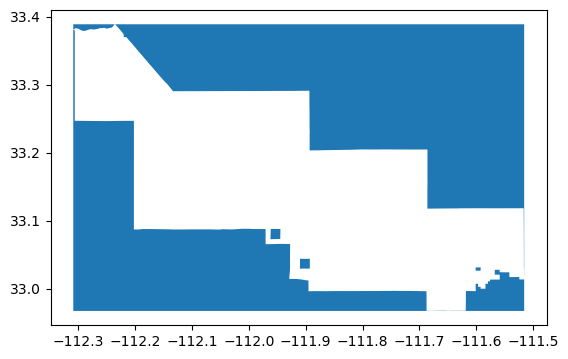

In [4]:
# Plot the boundary to view its shape
outside_gila_gdf.plot()

Next, clip your DataArray to the boundaries for both inside and outside
the reservation. You will need to replace the `GeoDataFrame` name with
your own. Check out the [lesson on clipping data with the `rioxarray`
library in the
textbook](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/crop-raster-data-with-shapefile-in-python/).

> **GOTCHA ALERT**
>
> It’s important to use `from_disk=True` when clipping large arrays like
> this. It allows the computer to use less valuable memory resources
> when clipping - you will probably find that otherwise the cell below
> crashes your kernel.

In [5]:
# Clip the NDVI data to both inside and outside the boundary

# Start by printing the area inside the boundary
ndvi_inside = ndvi_da.rio.clip(
    gr_boundary_gdf.geometry, from_disk=True)
print(ndvi_inside)

# Print the outside
ndvi_outside = ndvi_da.rio.clip(
    outside_gila_gdf.geometry, from_disk=True)
print(ndvi_outside)

<xarray.Dataset> Size: 47MB
Dimensions:      (x: 379, y: 202, date: 154)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 3kB -112.3 -112.3 -112.3 ... -111.5 -111.5 -111.5
  * y            (y) float64 2kB 33.39 33.38 33.38 33.38 ... 32.97 32.97 32.97
  * date         (date) datetime64[ns] 1kB 2001-01-14 2001-01-16 ... 2022-01-24
    spatial_ref  int64 8B 0
Data variables:
    NDVI         (date, y, x) float32 47MB nan nan nan nan ... nan nan nan nan
<xarray.Dataset> Size: 48MB
Dimensions:      (x: 380, y: 203, date: 154)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 3kB -112.3 -112.3 -112.3 ... -111.5 -111.5 -111.5
  * y            (y) float64 2kB 33.39 33.39 33.38 33.38 ... 32.97 32.97 32.97
  * date         (date) datetime64[ns] 1kB 2001-01-14 2001-01-16 ... 2022-01-24
    spatial_ref  int64 8B 0
Data variables:
    NDVI         (date, y, x) float32 48MB 0.6146 0.3796 ... 0.1736 0.2146


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>For <strong>both inside and outside</strong> the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="3"></span> boundary:</p>
<ul>
<li>Group the data by year</li>
<li>Take the mean. You always need to tell reducing methods in
<code>xarray</code> what dimensions you want to reduce. When you want to
summarize data across <strong>all</strong> dimensions, you can use the
<code>...</code> syntax, e.g. <code>.mean(...)</code> as a
shorthand.</li>
<li>Select the NDVI variable</li>
<li>Convert to a DataFrame using the <code>to_dataframe()</code>
method</li>
<li>Join the two DataFrames for plotting using the <code>.join()</code>
method. You will need to rename the columns using the
<code>lsuffix=</code> and <code>rsuffix=</code> parameters</li>
</ul>
<p>Finally, plot annual July means for both inside and outside the
Reservation on the same plot.</p></div></div>

> **GOTCHA ALERT**
>
> The DateIndex in pandas is a little different from the Datetime
> Dimension in xarray. You will need to use the `.dt.year` syntax to
> access information about the year, not just `.year`.

In [6]:
# Compute the mean annual July NDVI
# Group by year, calculate the NDVI average, then convert to a df
july_ndvi_inside_df = (ndvi_inside
                    .groupby(ndvi_inside.date.dt.year)
                    .mean(...)
                    .NDVI.to_dataframe()) 
print("Mean NDVI Inside GRNAC", july_ndvi_inside_df.head())

july_ndvi_outside_df = (ndvi_outside
                    .groupby(ndvi_outside.date.dt.year)
                    .mean(...)
                    .NDVI.to_dataframe())
print("Mean NDVI Outside GRNAC", july_ndvi_outside_df.head())

Mean NDVI Inside GRNAC       band  spatial_ref      NDVI
year                             
2001     1            0  0.199645
2002     1            0  0.177933
2003     1            0  0.187302
2004     1            0  0.176162
2005     1            0  0.238630
Mean NDVI Outside GRNAC       band  spatial_ref      NDVI
year                             
2001     1            0  0.247629
2002     1            0  0.226726
2003     1            0  0.229889
2004     1            0  0.221753
2005     1            0  0.255275


In [19]:
# Create a new dataframe via by joining the existing dataframes
july_ndvi_df = july_ndvi_inside_df[['NDVI']].join(
    july_ndvi_outside_df[['NDVI']], lsuffix=' Inside GRNAC',
    rsuffix=' Outside GRNAC')
july_ndvi_df

,NDVI Inside GRNAC,NDVI Outside GRNAC
year,,
2001,0.199645,0.247629
2002,0.177933,0.226726
2003,0.187302,0.229889
2004,0.176162,0.221753
2005,0.238630,0.255275
2006,0.211491,0.235571
2007,0.181710,0.211984
2008,0.201902,0.237739
2009,0.179118,0.218907


In [20]:
# Plot the mean NDVI both inside and outside the GRNAC
july_ndvi_df.hvplot(
    title='Mean NDVI Inside and Outside the GRNAC')

:NdOverlay   [Variable]
   :Curve   [year]   (value)

Now, take the difference between outside and inside the site boundary
and plot that. What do you observe? Don’t forget to write a headline and
description of your plot!

In [ ]:
# Establish the difference inside and outside the boundary
july_ndvi_df['Difference'] = (
    july_ndvi_df['NDVI Inside GRNAC'] - july_ndvi_df['NDVI Outside GRNAC'])
july_ndvi_df

,NDVI Inside GRNAC,NDVI Outside GRNAC,Difference
year,,,
2001,0.199645,0.247629,-0.047984
2002,0.177933,0.226726,-0.048793
2003,0.187302,0.229889,-0.042588
2004,0.176162,0.221753,-0.045591
2005,0.238630,0.255275,-0.016645
2006,0.211491,0.235571,-0.024079
2007,0.181710,0.211984,-0.030274
2008,0.201902,0.237739,-0.035836
2009,0.179118,0.218907,-0.039790


In [29]:
# Plot the difference inside and outside the boundary using the column
july_ndvi_df.Difference.hvplot(
    title='Difference in NDVI Inside and Outside GRNAC',
    height=300,
    width=600
)

:Curve   [year]   (Difference)

YOUR HEADLINE AND DESCRIPTION HERE

Headline: Following the restoration of water rights to the Gila River
Indian community (GRIC) in 2004, the area's normalized difference
vegetation index (NDVI) has slowly increased due to a larger water 
budget.

The Arizona Water Settlements Act implemented the Gila River Indian Community Water Rights Settlement in 2004, allocating the community an
annual water budget of of 653,500 acre-feet (U.S. Department of Justice Environmental and Natural Resources Division). This water budget draws 
on water from groundwater, the Gila River, Central Arizona Project, 
and the Salt River (U.S. Department of Justice). In spite of worsening drought conditions in the
southwestern United States, the increased water budget—in conjunction 
with concentrated invasive plant species removal and native plant 
species replanting efforts—has contributed to rising NDVI values within 
the GRIC boundary (Petrakis et al., 2023). Conversely, the NDVI outside
the GRIC boundary has been on the decline. Though the GRIC drawing on
outside water sources may be a contributor to this decline, the 
community is a major player in Colorado River water conservation
advocacy (U.S. Department of the Interior). Land outside the GRIC 
boundary may be managed less intensively—management that may offset
the impacts of intensifying drought and invasive species encroachment.

References
Petrakis, R. E., Norman, L. M., & Middleton, B. R. (2023). Riparian vegetation response amid variable climate conditions across the Upper 
Gila River watershed: informing Tribal restoration priorities. *Frontiers
in Environmental Science*, *11*, 1179328. 
https://doi.org/10.3389/fenvs.2023.1179328

U.S. Department of Justice. *Gila River Indian Community Water Rights Settlement*. https://www.justice.gov/enrd/indian-resources-section/gila-river-indian-community

U.S. Department of the Interior. *Biden-Harris Administration Announces 
Up to $233 Million in Water Conservation Funding for Gila River Indian Community*. https://www.doi.gov/pressreleases/biden-harris-administration-announces-233-million-water-conservation-funding-gila


# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [9]:
%store var1 var2

UsageError: Unknown variable 'var1'


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!